In [2]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix



In [68]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/project1/Project1_Data.csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)

# Displaying first 10 rows of the data
df.head(5)



,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [69]:
df[['enroll_cnt','grad_cnt' ,'grad_pct','local_cnt','local_pct']]

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct
0,658,464,71%,63,10%
1,324,246,76%,30,9%
2,334,218,65%,33,10%
3,-,-,-,-,-
4,367,248,68%,42,11%
...,...,...,...,...,...
73147,-,-,-,-,-
73148,-,-,-,-,-
73149,-,-,-,-,-
73150,-,-,-,-,-


In [70]:
df.shape


(73152, 29)

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [72]:
df['dropout_cnt'].value_counts()

-      33478
0       7593
1       6271
2       4296
3       3257
       ...  
930        1
368        1
715        1
765        1
378        1
Name: dropout_cnt, Length: 445, dtype: int64

In [73]:
# Drop rows where the target variable contains '-'
df = df[df['dropout_cnt'] != '-']

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [74]:
df[['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct']]

,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct
0,71%,10%,47%,14%,2%,5%,0%,22%
1,76%,9%,52%,15%,1%,3%,0%,20%
2,65%,10%,42%,13%,4%,6%,0%,25%
3,68%,11%,50%,6%,3%,5%,0%,25%
4,59%,13%,41%,5%,4%,8%,0%,29%
...,...,...,...,...,...,...,...,...
39669,69%,6%,56%,8%,3%,3%,0%,25%
39670,90%,6%,67%,17%,0%,0%,0%,10%
39671,15%,0%,15%,0%,23%,15%,0%,46%
39672,70%,0%,61%,9%,9%,0%,0%,21%


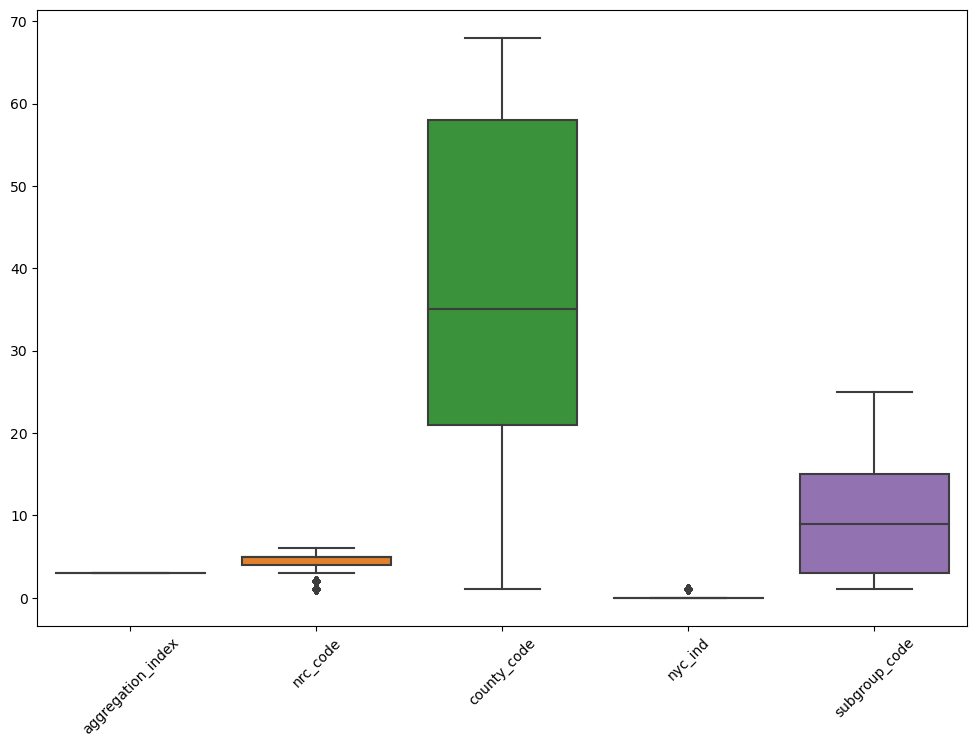

In [75]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [76]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Replace 'target_variable' with the name of your target variable column
# Replace ['predictor1', 'predictor2', ...] with the names of your predictor variables

# Select relevant columns for correlation analysis
selected_columns = ['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct', 'enroll_cnt' ,'grad_cnt', 'local_cnt', 'reg_cnt',
    'reg_adv_cnt', 'non_diploma_credential_cnt', 
    'still_enr_cnt',  'ged_cnt','dropout_cnt','dropout_pct']  # Add all predictor variables here
correlation_df = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Extract correlation coefficients with the target variable
target_correlation = correlation_matrix['dropout_cnt'].drop('dropout_cnt')  # Drop target variable from the list

# Sort correlation coefficients by absolute values (optional)
target_correlation = target_correlation.abs().sort_values(ascending=False)

# Print correlation coefficients
print("Correlation coefficients with the target variable:")
print(target_correlation)


C:\Users\admin\AppData\Local\Temp\ipykernel_11936\4048147547.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


KeyError: 'dropout_cnt'

In [77]:
correlation_matrix = correlation_df.corr()
correlation_matrix

C:\Users\admin\AppData\Local\Temp\ipykernel_11936\3190028487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


""


ValueError: zero-size array to reduction operation fmin which has no identity

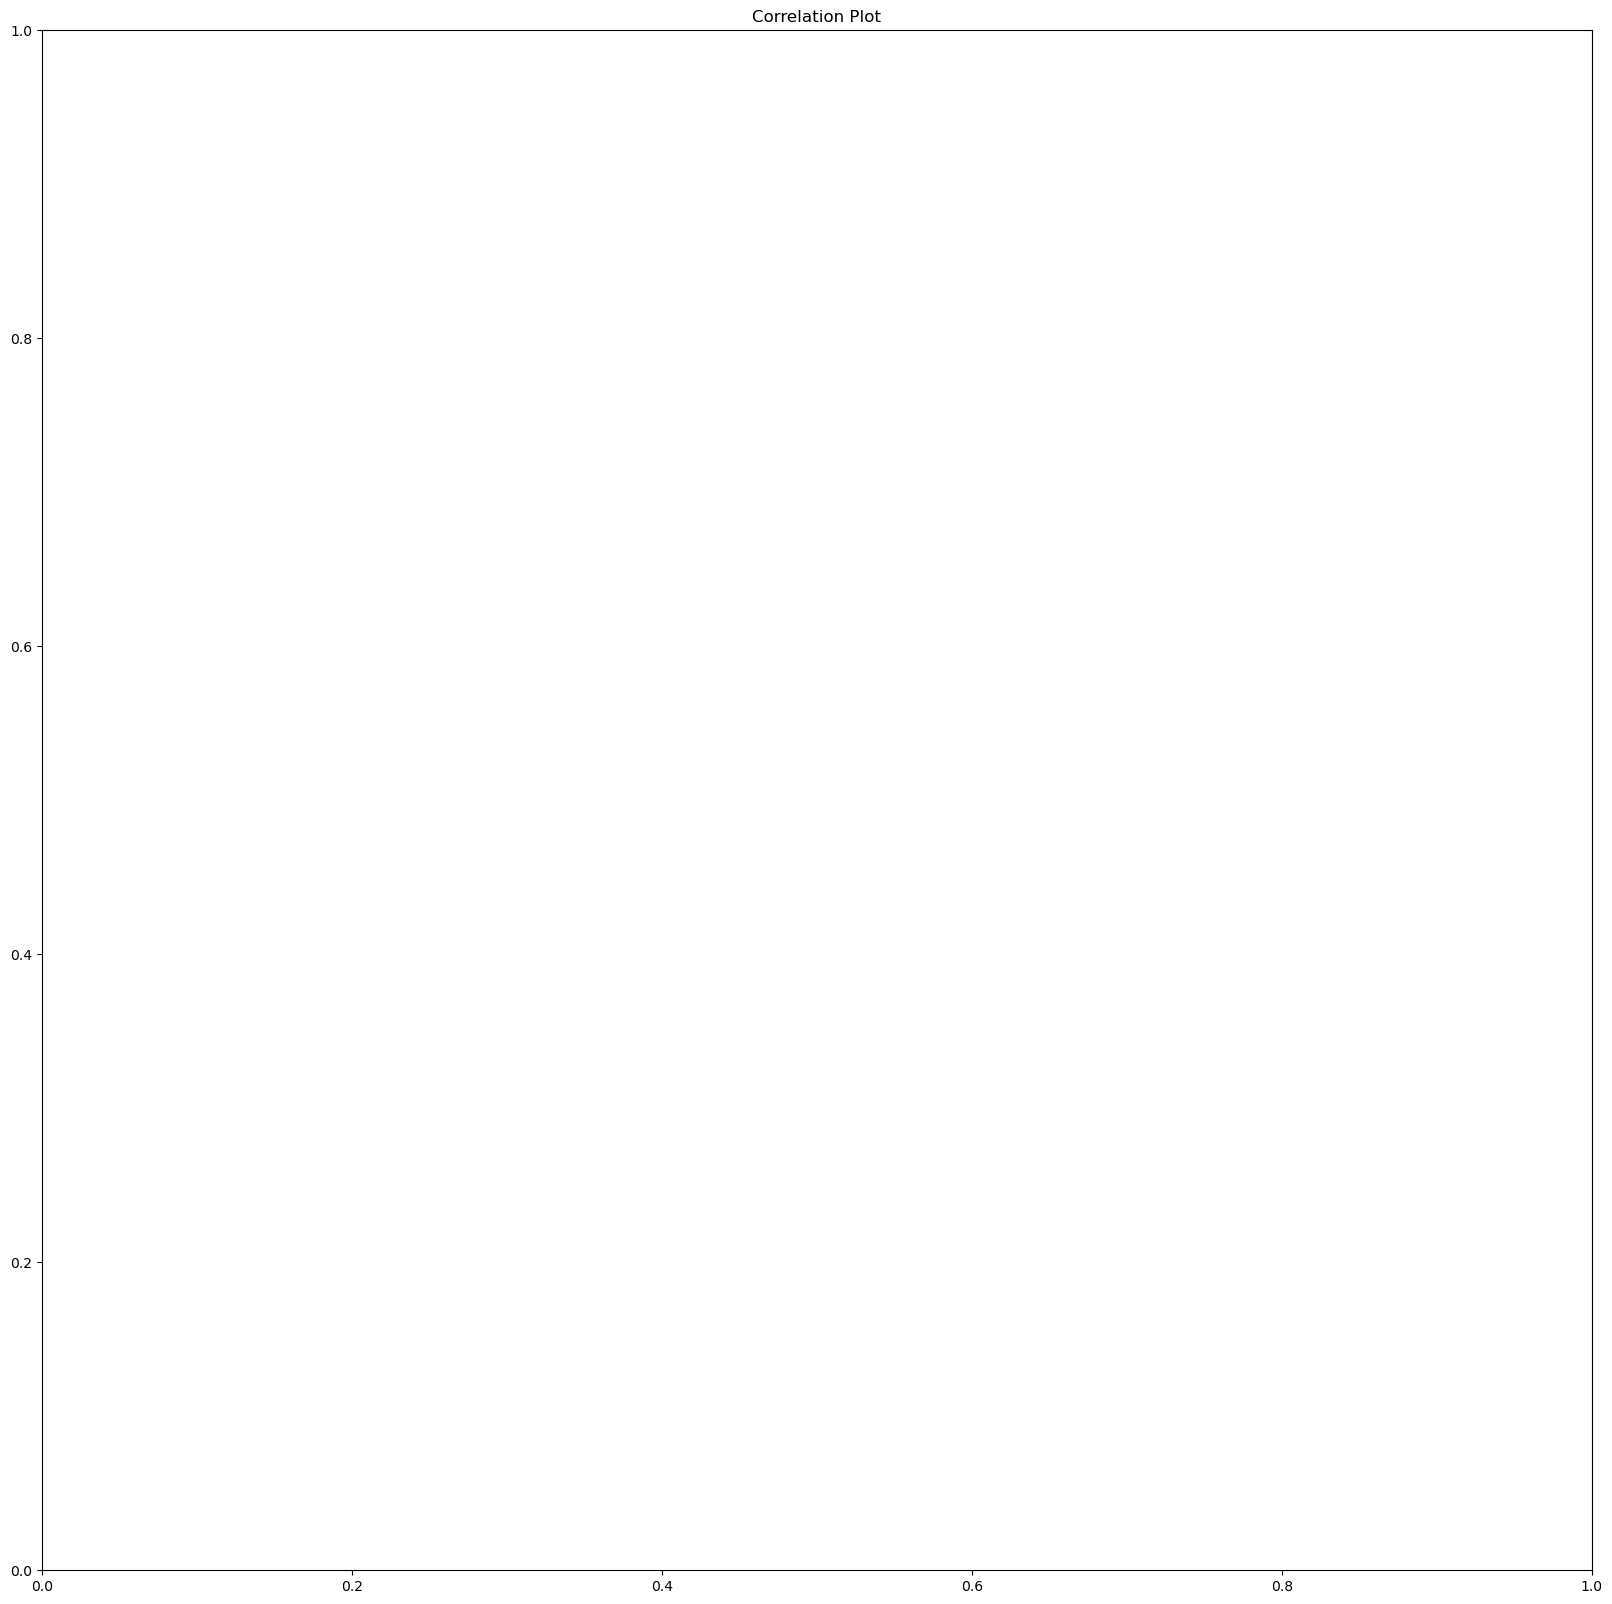

In [78]:
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(correlation_matrix,annot=True)
plt.show()

# Example: Predictive imputation using linear regression
from sklearn.linear_model import LinearRegression

# Select features for prediction
X = df.dropna(subset=['enroll_cnt'], axis=0).drop(['enroll_cnt',], axis=1)
y = df.dropna(subset=['enroll_cnt'], axis=0)['enroll_cnt']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Impute missing values using the trained model
X_missing = df[df['enroll_cnt'].isna()].drop(['enroll_cnt'], axis=1)
predicted_enroll = model.predict(X_missing)
df.loc[df['enroll_cnt'].isna(), 'enroll_cnt_imputed'] = predicted_enroll


In [79]:
# Remove '%' sign and convert to integer
perc=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct']
for col in perc:
    df[col] = df[col].str.rstrip('%').astype(int)

In [80]:
# Columns to convert to numeric
numeric_cols = [
    'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
    'reg_adv_cnt', 'non_diploma_credential_cnt', 
    'still_enr_cnt',  'ged_cnt',  'dropout_cnt', 
]

# Convert object columns to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [81]:
df['nyc_ind'] = df['nyc_ind'].astype(bool)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  bool  
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  int64 
 13  grad_cnt                    39674 non-null  in

In [83]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: report_school_year
2018-19    39674
Name: report_school_year, dtype: int64

Column: aggregation_index
3    39674
Name: aggregation_index, dtype: int64

Column: aggregation_type
District    39674
Name: aggregation_type, dtype: int64

Column: aggregation_name
SYRACUSE CITY SCHOOL DISTRICT                         116
NEW YORK CITY GEOGRAPHIC DISTRICT #28                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #14                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #31                 108
                                                     ... 
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT          4
FISHERS ISLAND UNION FREE SCHOOL DISTRICT               4
LONG LAKE CENTRAL SCHOOL DISTRICT                       2
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT      2
BERKSHIRE UNION FREE SCHOOL DISTRICT                    2
Name: aggregation_name, Length: 677, dtype: int64

Column: nrc_code
5    18260
6     7136
4     

In [54]:
df[ (df['county_code'] == 58) & (df['nrc_code'] == 5)]['aggregation_name'].value_counts()

LONGWOOD CENTRAL SCHOOL DISTRICT                    102
RIVERHEAD CENTRAL SCHOOL DISTRICT                   102
MIDDLE COUNTRY CENTRAL SCHOOL DISTRICT              100
HUNTINGTON UNION FREE SCHOOL DISTRICT                98
SOUTH HUNTINGTON UNION FREE SCHOOL DISTRICT          96
SACHEM CENTRAL SCHOOL DISTRICT                       96
PATCHOGUE-MEDFORD UNION FREE SCHOOL DISTRICT         96
WILLIAM FLOYD UNION FREE SCHOOL DISTRICT             94
BAY SHORE UNION FREE SCHOOL DISTRICT                 94
NORTH BABYLON UNION FREE SCHOOL DISTRICT             92
SOUTH COUNTRY CENTRAL SCHOOL DISTRICT                90
WEST BABYLON UNION FREE SCHOOL DISTRICT              84
BROOKHAVEN-COMSEWOGUE UNION FREE SCHOOL DISTRICT     82
ISLIP UNION FREE SCHOOL DISTRICT                     82
DEER PARK UNION FREE SCHOOL DISTRICT                 80
LINDENHURST UNION FREE SCHOOL DISTRICT               78
CONNETQUOT CENTRAL SCHOOL DISTRICT                   76
ROCKY POINT UNION FREE SCHOOL DISTRICT          

In [84]:
df.describe()

,aggregation_index,nrc_code,county_code,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,39674.0,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,...,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.456269,36.774613,8.833795,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,0.0,1.367020,20.063556,5.768892,439.972474,361.294773,15.679500,32.046302,10.398486,225.795826,...,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,3.0,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,21.000000,3.000000,25.000000,20.000000,79.000000,1.000000,2.000000,10.000000,...,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,35.000000,9.000000,66.000000,57.000000,89.000000,4.000000,6.000000,27.000000,...,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,58.000000,15.000000,179.000000,156.000000,95.000000,10.000000,11.000000,69.000000,...,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,25.000000,9176.000000,7540.000000,100.000000,557.000000,100.000000,4752.000000,...,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


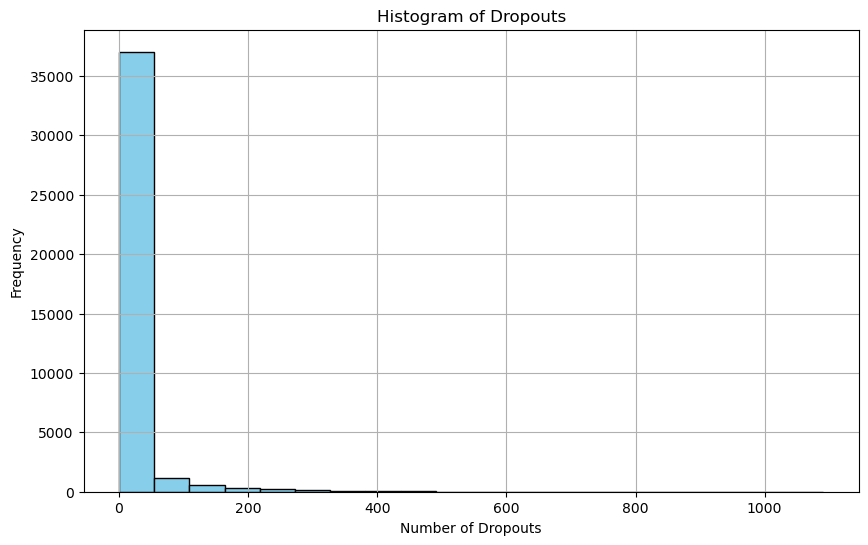

In [21]:
variable = 'dropout_cnt'

# Plot histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df[variable], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Dropouts')
plt.ylabel('Frequency')
plt.title('Histogram of Dropouts')
plt.grid(True)
plt.show()


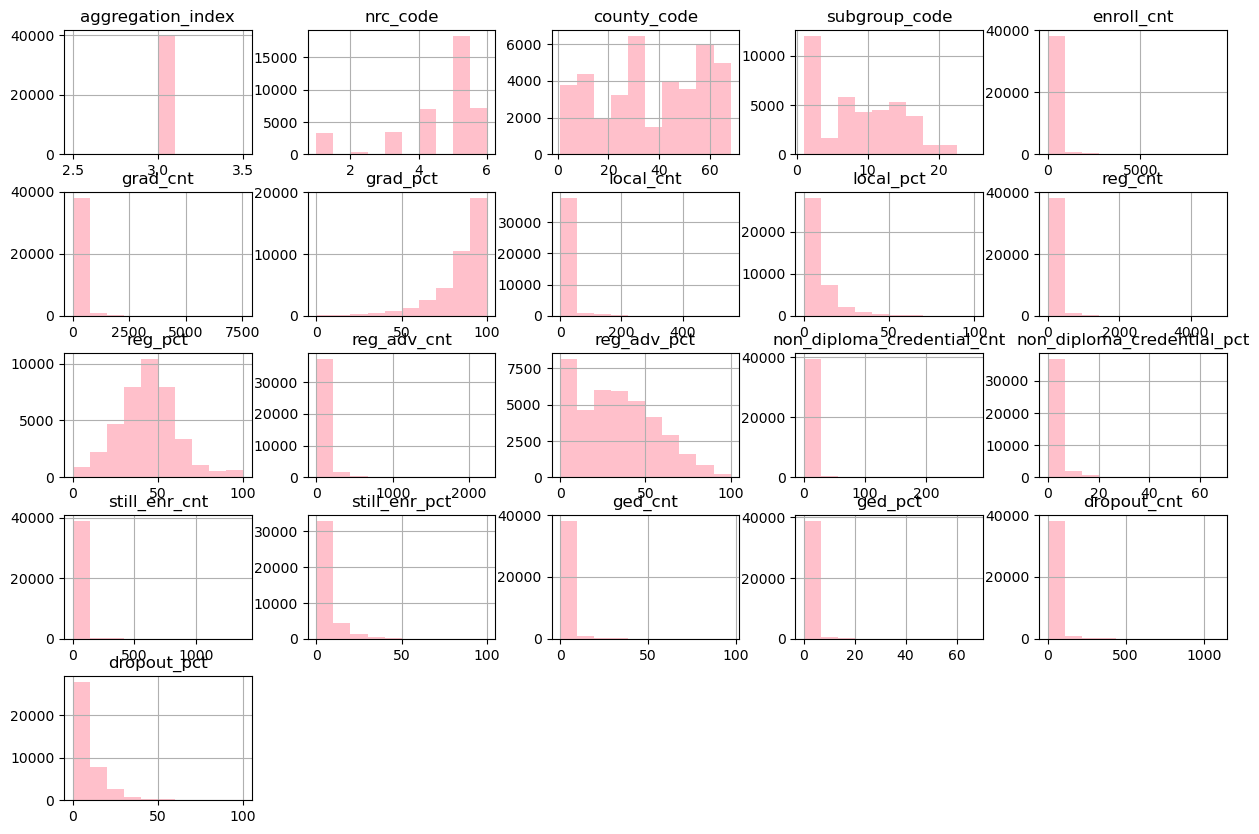

In [22]:
df[df.columns].hist(figsize=(15,10), color='pink');

In [85]:
df.drop(columns=['report_school_year', 'aggregation_index', 'aggregation_type'], inplace=True)


In [86]:
df.drop(columns=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct'],inplace=True)

In [87]:
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,63,310,91,16,30,0,148
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,30,169,47,2,11,0,65
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,33,141,44,14,19,0,83
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,42,183,23,10,18,0,91
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,13,40,5,4,8,0,28


In [26]:
v=df['aggregation_name'].value_counts()

In [81]:
# Replace 'column_name' with the name of the column you want to analyze
column_name_value_counts = df['aggregation_name'].value_counts()

# Print the unique values a['aggregation_namend their counts
print(column_name_value_counts)


SYRACUSE CITY SCHOOL DISTRICT                         116
NEW YORK CITY GEOGRAPHIC DISTRICT #28                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #14                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #31                 108
                                                     ... 
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT          4
FISHERS ISLAND UNION FREE SCHOOL DISTRICT               4
LONG LAKE CENTRAL SCHOOL DISTRICT                       2
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT      2
BERKSHIRE UNION FREE SCHOOL DISTRICT                    2
Name: aggregation_name, Length: 677, dtype: int64


In [27]:
# Replace 'column_name' with the name of the column you want to analyze
unique_values = df['aggregation_name'].unique()

# Print the unique values
print(unique_values)


['ALBANY CITY SCHOOL DISTRICT'
 'BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT'
 'BETHLEHEM CENTRAL SCHOOL DISTRICT'
 'RAVENA-COEYMANS-SELKIRK CENTRAL SCHOOL DISTRICT'
 'COHOES CITY SCHOOL DISTRICT' 'SOUTH COLONIE CENTRAL SCHOOL DISTRICT'
 'NORTH COLONIE CSD' 'GREEN ISLAND UNION FREE SCHOOL DISTRICT'
 'GUILDERLAND CENTRAL SCHOOL DISTRICT'
 'VOORHEESVILLE CENTRAL SCHOOL DISTRICT' 'WATERVLIET CITY SCHOOL DISTRICT'
 'ALFRED-ALMOND CENTRAL SCHOOL DISTRICT' 'ANDOVER CENTRAL SCHOOL DISTRICT'
 'GENESEE VALLEY CENTRAL SCHOOL DISTRICT'
 'BELFAST CENTRAL SCHOOL DISTRICT' 'CANASERAGA CENTRAL SCHOOL DISTRICT'
 'FRIENDSHIP CENTRAL SCHOOL DISTRICT' 'FILLMORE CENTRAL SCHOOL DISTRICT'
 'WHITESVILLE CENTRAL SCHOOL DISTRICT'
 'CUBA-RUSHFORD CENTRAL SCHOOL DISTRICT' 'SCIO CENTRAL SCHOOL DISTRICT'
 'WELLSVILLE CENTRAL SCHOOL DISTRICT'
 'BOLIVAR-RICHBURG CENTRAL SCHOOL DISTRICT'
 'CHENANGO FORKS CENTRAL SCHOOL DISTRICT'
 'BINGHAMTON CITY SCHOOL DISTRICT' 'HARPURSVILLE CENTRAL SCHOOL DISTRICT'
 'SUSQUEHANNA V

In [28]:
len(unique_values)

677

In [33]:

import pandas as pd

# Assuming df is your DataFrame with the "nrc_desc" column

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['nrc_desc'])

# Concatenate the one-hot encoded columns with your original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "nrc_desc" column as it's no longer needed
df_encoded.drop('nrc_desc', axis=1, inplace=True)

# Now you can use df_encoded in your Poisson regression model



In [88]:
df.drop(columns=['county_name','subgroup_name','nrc_desc'],inplace=True)

In [89]:
df.head()

,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,3,1,False,2013 Total Cohort - 6 Year Outcome,1,658,464,63,310,91,16,30,0,148
1,ALBANY CITY SCHOOL DISTRICT,3,1,False,2013 Total Cohort - 6 Year Outcome,2,324,246,30,169,47,2,11,0,65
2,ALBANY CITY SCHOOL DISTRICT,3,1,False,2013 Total Cohort - 6 Year Outcome,3,334,218,33,141,44,14,19,0,83
3,ALBANY CITY SCHOOL DISTRICT,3,1,False,2013 Total Cohort - 6 Year Outcome,5,367,248,42,183,23,10,18,0,91
4,ALBANY CITY SCHOOL DISTRICT,3,1,False,2013 Total Cohort - 6 Year Outcome,6,98,58,13,40,5,4,8,0,28


In [90]:
df['nyc_ind'] = df['nyc_ind'].astype(int)

In [91]:

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['membership_desc'])

# Concatenate the one-hot encoded columns with your original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "nrc_desc" column as it's no longer needed
df_encoded.drop('membership_desc', axis=1, inplace=True)

In [92]:
df_encoded

,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,1,658,464,63,310,91,16,30,0,148,1,0,0,0,0,0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2,324,246,30,169,47,2,11,0,65,1,0,0,0,0,0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,3,334,218,33,141,44,14,19,0,83,1,0,0,0,0,0
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,5,367,248,42,183,23,10,18,0,91,1,0,0,0,0,0
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,6,98,58,13,40,5,4,8,0,28,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,3,36,25,2,20,3,1,1,0,9,0,1,0,0,0,0
39670,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,10,48,43,3,32,8,0,0,0,5,0,1,0,0,0,0
39671,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,11,13,2,0,2,0,3,2,0,6,0,1,0,0,0,0
39672,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,15,33,23,0,20,3,3,0,0,7,0,1,0,0,0,0


In [48]:
summary_stats = df.groupby('aggregation_name')['dropout_cnt'].agg(['mean', 'median', 'std'])
print(summary_stats)

                                                mean  median        std
aggregation_name                                                       
ADDISON CENTRAL SCHOOL DISTRICT             4.636364     4.0   2.902212
ADIRONDACK CENTRAL SCHOOL DISTRICT          3.727273     3.0   2.696799
AFTON CENTRAL SCHOOL DISTRICT               3.210526     3.0   2.315143
AKRON CENTRAL SCHOOL DISTRICT               2.880000     3.0   1.923432
ALBANY CITY SCHOOL DISTRICT                59.702128    64.0  44.698231
...                                              ...     ...        ...
WYANDANCH UNION FREE SCHOOL DISTRICT       12.552632    11.0   8.937404
YONKERS CITY SCHOOL DISTRICT               32.611111    22.5  32.672499
YORK CENTRAL SCHOOL DISTRICT                0.521739     0.0   0.657914
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT   6.200000     6.0   3.703280
YORKTOWN CENTRAL SCHOOL DISTRICT            1.250000     1.0   1.071395

[677 rows x 3 columns]


In [97]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is your DataFrame containing the 'aggregation_name' column
sentences = [name.split() for name in df_encoded['aggregation_name']]

# Train Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Get vocabulary and embeddings
word_vectors = model.wv
vocabulary = word_vectors.index_to_key
embeddings = [word_vectors[word] for word in vocabulary]

# Create DataFrame for embeddings
embedding_df = pd.DataFrame(embeddings, index=vocabulary)

# Save the embeddings
#embedding_df.to_csv("aggregation_name_embeddings.csv")


In [94]:
sentences

[['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY', 'CITY', 'SCHOOL', 'DISTRICT'],
 ['ALBANY',

In [98]:
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
DISTRICT,0.058380,-0.003740,0.382941,0.549384,-0.175159,-0.360423,0.351989,0.186275,-0.076724,-0.058457,...,0.194332,-0.010597,0.286854,-0.273918,0.071537,0.314581,0.488557,-0.480210,-0.072201,-0.074964
SCHOOL,-0.292811,0.123008,0.085620,0.224155,0.436256,-0.360163,0.440634,0.310756,-0.215888,0.051347,...,0.098126,0.469510,0.150369,-0.397785,-0.067677,0.229476,0.457357,-0.358131,-0.232203,-0.106792
CENTRAL,-0.003546,-0.064626,0.271685,0.767260,0.442219,-0.351615,0.451024,-0.265570,-0.384452,0.228875,...,-0.113326,0.796043,0.655901,-0.317859,0.535317,0.613436,0.912924,-0.401442,0.390997,-0.055439
CITY,-0.133083,0.401718,0.423024,-0.405811,0.189730,-0.140322,0.224389,0.276318,0.088659,-0.581618,...,-0.185822,0.128792,-0.178544,0.012214,0.202040,0.092922,1.427176,-0.058705,-0.848724,-0.527601
UNION,-0.192321,0.342824,-0.155636,-0.442434,0.120362,0.133298,-0.062564,0.323721,-0.124894,-0.058596,...,0.481565,0.256466,0.462656,-0.256166,0.324937,-0.577770,0.678420,-0.197410,0.215549,-0.485144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FISHERS,-0.046375,-0.017992,0.047806,-0.002890,-0.043916,-0.062144,-0.017185,-0.022691,-0.016708,-0.070019,...,0.078756,0.081382,0.080054,-0.055898,-0.009722,0.027151,0.106049,-0.006796,-0.065701,0.007213
KIRYAS,-0.049081,-0.017414,0.065331,0.006457,-0.067435,-0.086810,-0.040117,-0.001452,-0.050489,-0.106962,...,0.066603,0.105883,0.127860,-0.075173,-0.009465,0.055710,0.147114,-0.001702,-0.082470,0.015452
BERKSHIRE,-0.028809,0.003860,0.036114,-0.006380,0.000049,-0.025449,0.000173,-0.000204,0.000211,-0.029903,...,0.010803,0.016023,0.012411,-0.041666,0.010872,0.016354,0.023284,-0.025902,-0.020865,0.013722
CASTLE,-0.020830,-0.011883,0.023294,-0.012003,-0.027419,-0.033472,0.010584,-0.003545,-0.005075,-0.036288,...,0.041890,0.045780,0.027764,-0.019715,-0.015356,0.007945,0.060593,-0.006721,-0.047623,-0.004106


In [100]:
merged_df = pd.merge(df_encoded, embedding_df, left_on='aggregation_name', right_index=True, how='left')


In [102]:

erged_df#merged_df = pd.merge(left=df_encoded, right=embedding_df, on='aggregation_name', how='inner')

NameError: name 'erged_df' is not defined

In [63]:
missing_values = df['aggregation_name'].isnull().sum()
#if missing_values > 0:
    # Handle missing values (e.g., impute or drop)
    #df = df.dropna(subset=['aggregation_name'])

In [111]:
merged_df


,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,...,90,91,92,93,94,95,96,97,98,99
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,1,658,464,63,310,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2,324,246,30,169,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,3,334,218,33,141,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,5,367,248,42,183,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,6,98,58,13,40,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,3,36,25,2,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39670,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,10,48,43,3,32,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39671,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,11,13,2,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39672,DUNDEE CENTRAL SCHOOL DISTRICT,4,68,0,15,33,23,0,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
